<a href="https://colab.research.google.com/github/Paolo20224/Prueba/blob/main/EEG_machinelearing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Como parte inicial, descargamos la informacion y la cargamos en nuestro cuader en Colab
import pandas as pd
filename = "/content/EEG.machinelearing_data_BRMH.csv"
df = pd.read_csv(filename)

1.Analisis y Depuracion de Datos

In [35]:
# A continuacion revisaremos la categoria de cada dato, asi como tambien su integridad (verificacion de nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1149 entries, no. to COH.F.gamma.r.O1.s.O2
dtypes: float64(1144), int64(1), object(4)
memory usage: 8.3+ MB


In [36]:
#A continuacion revisaremos el archivo en excel para validar que elementos conducentes a error puede contener esta base.
df.to_excel("EEGML.xlsx", index=False)

In [42]:
df2=df
df2 = df2.dropna(subset=["education"])
df2 = df2.dropna(subset=["IQ"])

1. Creacion y Optimizacion de Modelo Predictivo

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Preparamos el dataset

In [52]:
X=df2.drop(columns=['main.disorder','sex','eeg.date','specific.disorder','Unnamed: 122'])
y = df2['main.disorder'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creamos el Modelo

In [53]:
#Realizamos iteraciones para "N° de vecinos" y nos quedamos con el mejor equilibrio para el nivel de precision de test y entrenamiento.

n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.51
Accuracy of K-NN classifier on test set: 0.22


Resultados obtenidos

In [54]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[20  8  5 12  1  3  4]
 [14  8  4  7  0  0  2]
 [ 8  4  5  4  0  3  2]
 [20 10  7 21  3  4  4]
 [ 3  4  3  3  0  0  1]
 [17  9  1  8  1  3  0]
 [14  7  2 10  1  3  3]]
                                    precision    recall  f1-score   support

                Addictive disorder       0.21      0.38      0.27        53
                  Anxiety disorder       0.16      0.23      0.19        35
                   Healthy control       0.19      0.19      0.19        26
                     Mood disorder       0.32      0.30      0.31        69
     Obsessive compulsive disorder       0.00      0.00      0.00        14
                     Schizophrenia       0.19      0.08      0.11        39
Trauma and stress related disorder       0.19      0.07      0.11        40

                          accuracy                           0.22       276
                         macro avg       0.18      0.18      0.17       276
                      weighted avg       0.21      0.22      0.20    

Arbol de Decision

In [55]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

KeyError: ignored

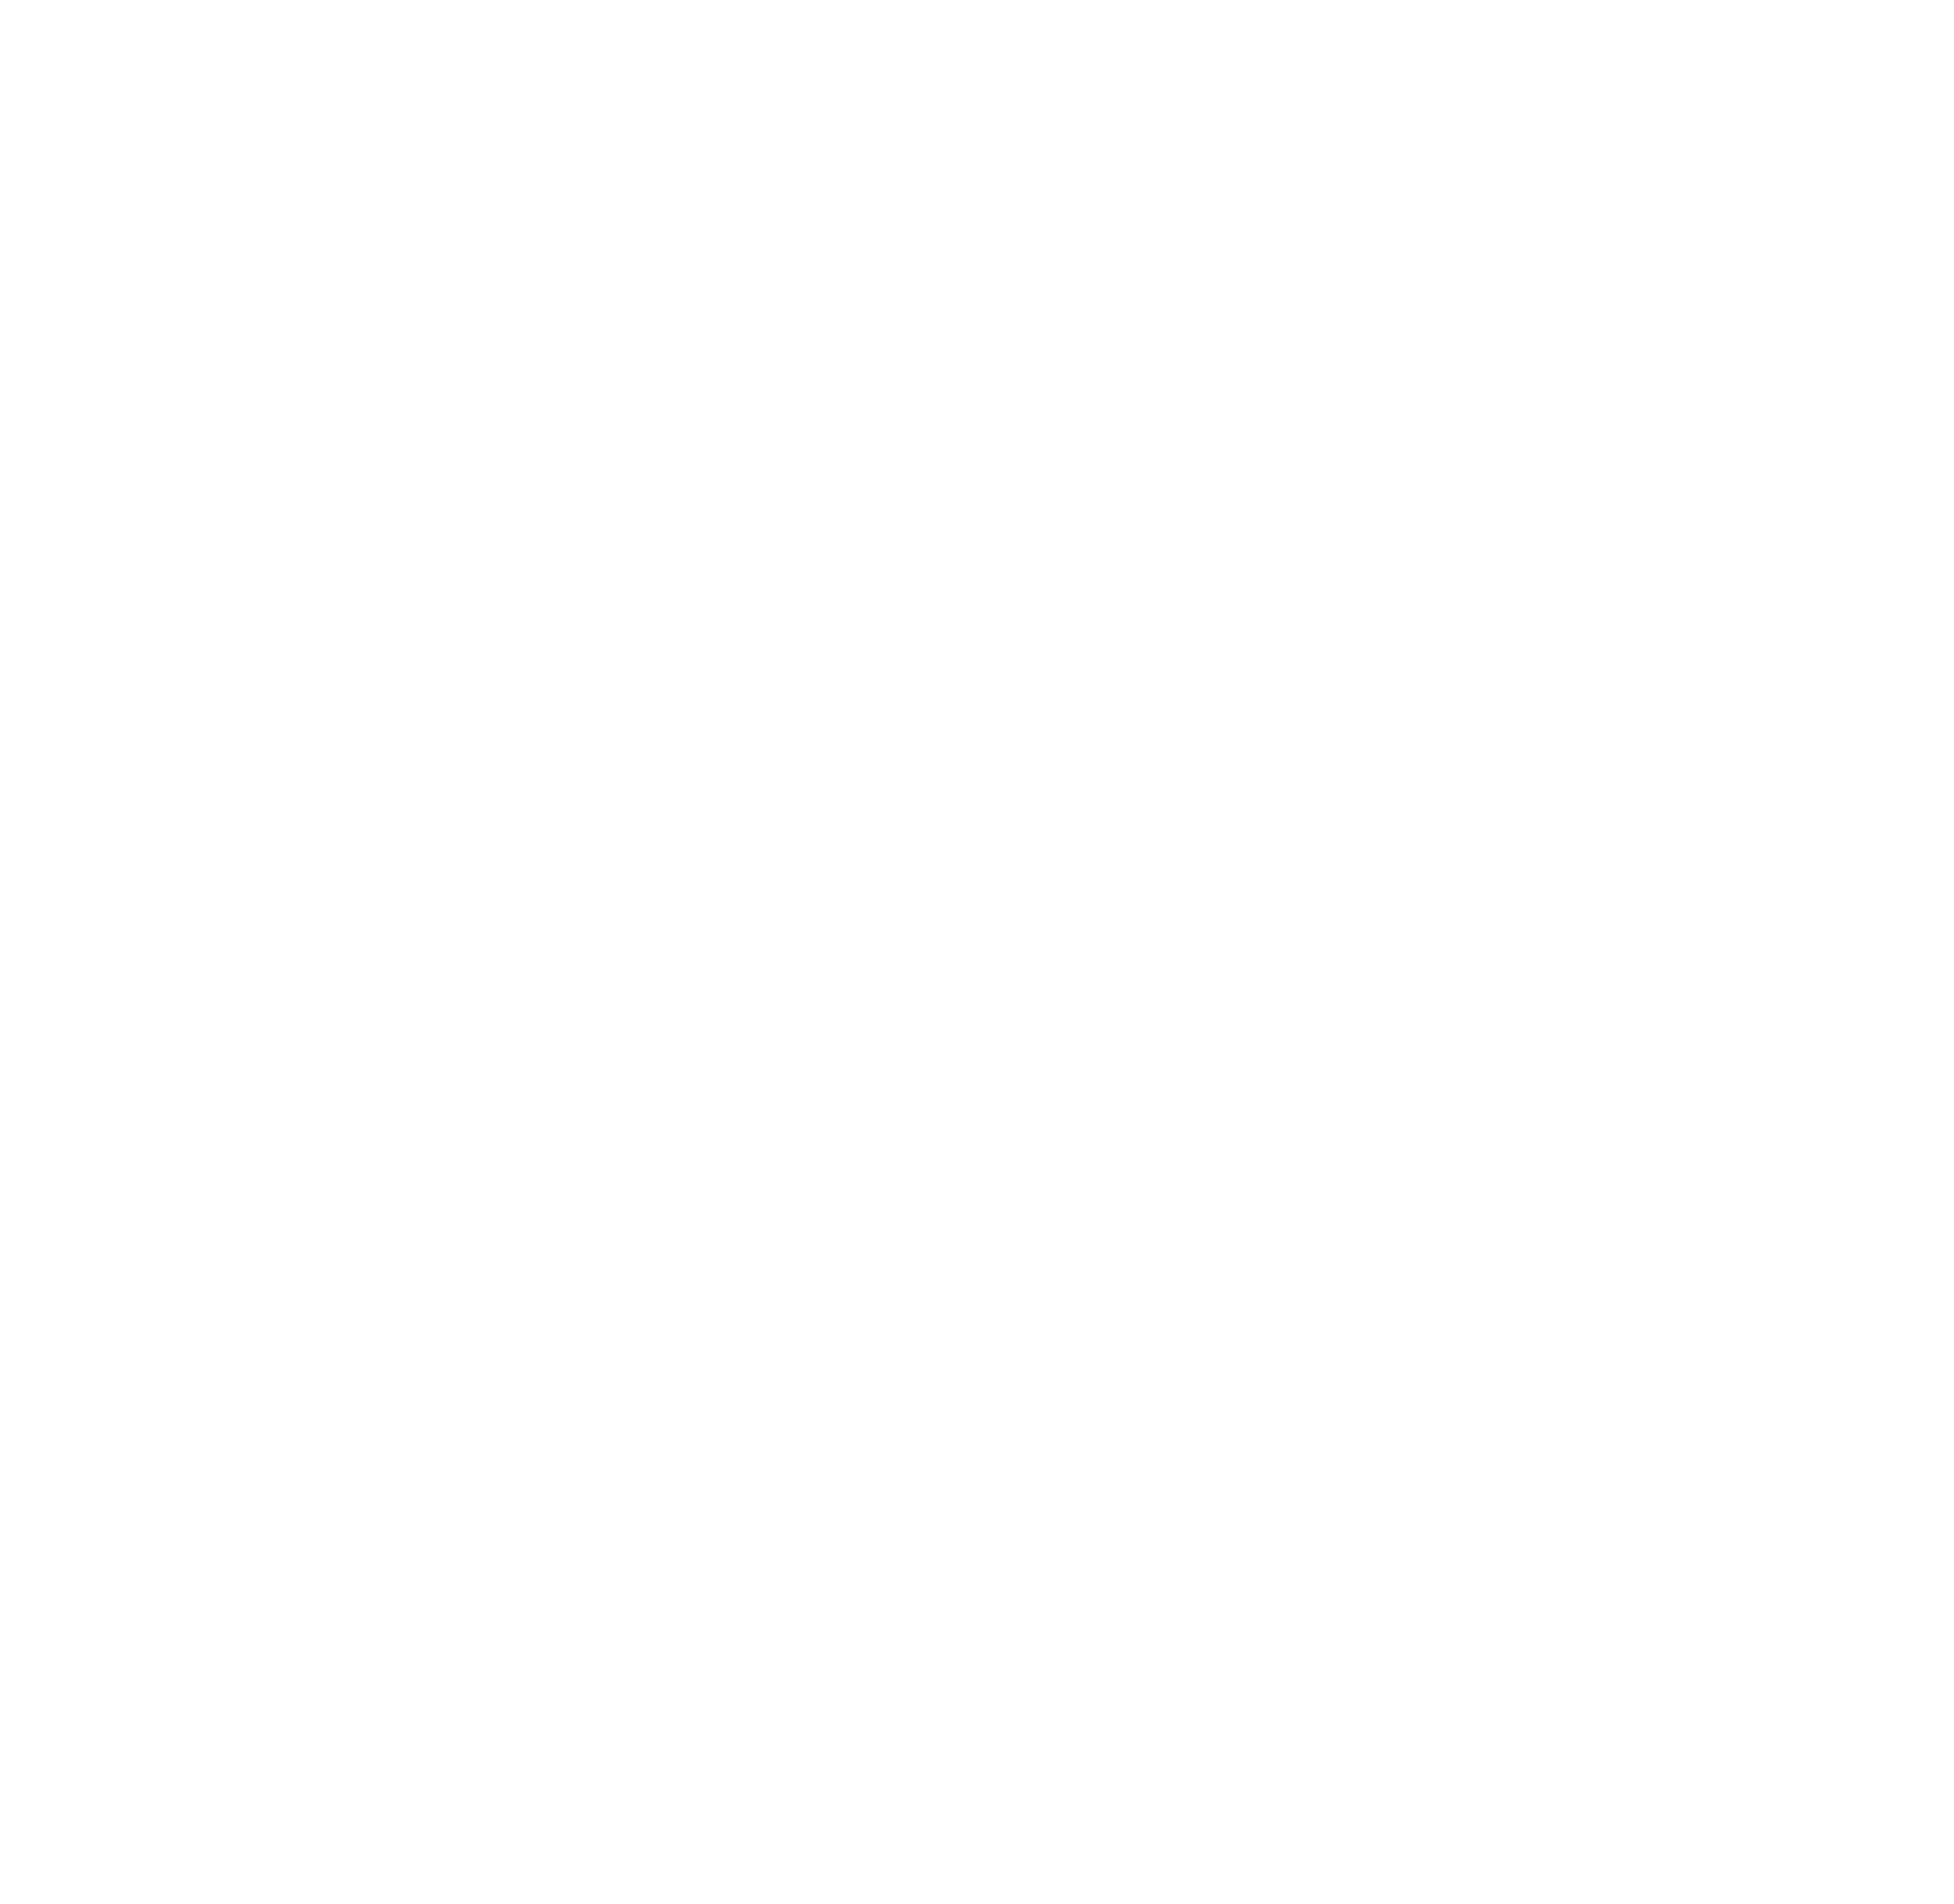

In [57]:
X=df2.drop(columns=['main.disorder','sex','eeg.date','specific.disorder','Unnamed: 122']).values
y=df2['main.disorder'].values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=123)

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
# Visualizando árbol de decisión
plt.figure(figsize=(120,120))
tree.plot_tree(
    tree_clf,
    feature_names= df2.drop(columns=['main.disorder','sex','eeg.date','specific.disorder','Unnamed: 122']),
    class_names=['Addictive disorder','Trauma and stress related disorder','Mood disorder','Healthy control','Obsessive compulsive disorder','Schizophrenia','Anxiety disorder'],
    rounded=True,
    filled=True)
# Nueva instancia
# CALCULAMOS LAS Probabilidades por cada clase
print(tree_clf.predict_proba(X_test))
# Clase predicha
pred=tree_clf.predict(X_test)
print("Esta instancia pertenece a la clase",tree_clf.predict(X_test))

In [ ]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))